In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
claimants = pd.read_csv("C:/Users/harik/python pratice/00 - datasets-20251216T065029Z-1-001/00 - datasets/claimants.csv")
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [3]:
claimants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1340 non-null   int64  
 1   ATTORNEY  1340 non-null   int64  
 2   CLMSEX    1328 non-null   float64
 3   CLMINSUR  1299 non-null   float64
 4   SEATBELT  1292 non-null   float64
 5   CLMAGE    1151 non-null   float64
 6   LOSS      1340 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


#### Handle Null values

In [4]:
sex_mode = claimants['CLMSEX'].mode()[0]
seat_mode =  claimants['SEATBELT'].mode()[0]
ins_mode = claimants['CLMINSUR'].mode()[0]
sex_mode, seat_mode,ins_mode

(1.0, 0.0, 1.0)

In [5]:
age_mean = claimants['CLMAGE'].mean()
age_mean = np.round(age_mean)

In [6]:
claimants.fillna({'CLMSEX':sex_mode,
                 'CLMINSUR':ins_mode,
                 'SEATBELT':seat_mode,
                  'CLMAGE':age_mean
                 },inplace=True)

In [7]:
claimants.isna().sum()

CASENUM     0
ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [8]:
claimants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1340 non-null   int64  
 1   ATTORNEY  1340 non-null   int64  
 2   CLMSEX    1340 non-null   float64
 3   CLMINSUR  1340 non-null   float64
 4   SEATBELT  1340 non-null   float64
 5   CLMAGE    1340 non-null   float64
 6   LOSS      1340 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


##### Split the data

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = claimants.iloc[:,2:]
y = claimants['ATTORNEY']

In [11]:
X.head()

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038


In [12]:
y.head()

0    0
1    1
2    1
3    0
4    1
Name: ATTORNEY, dtype: int64

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1072, 5), (268, 5), (1072,), (268,))

##### Build the model

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

##### Test the model on training data

In [16]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [17]:
yhat_train = clf.predict(X_train)

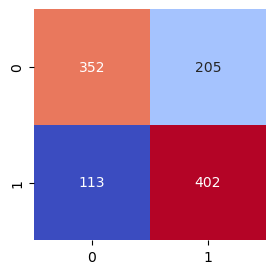

              precision    recall  f1-score   support

           0       0.76      0.63      0.69       557
           1       0.66      0.78      0.72       515

    accuracy                           0.70      1072
   macro avg       0.71      0.71      0.70      1072
weighted avg       0.71      0.70      0.70      1072



In [18]:
plt.figure(figsize=(3,3))
cm = confusion_matrix(y_train,yhat_train)
sns.heatmap(cm, cmap='coolwarm', cbar=False, annot=True, fmt='d')
plt.show()
print(classification_report(y_train,yhat_train))

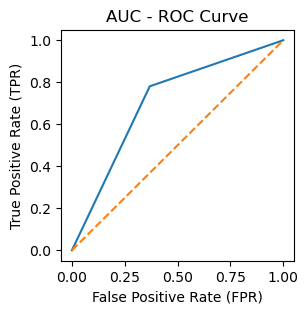

In [19]:
plt.figure(figsize=(3,3))
plt.title('AUC - ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')

fpr,tpr,thresh = roc_curve(y_train,yhat_train)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle='dashed')
plt.show()

##### Test the model on testing data - unseen data

In [20]:
yhat_test = clf.predict(X_test)

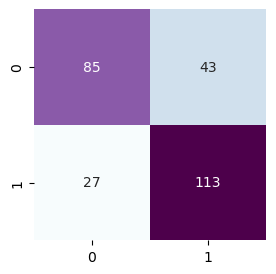

              precision    recall  f1-score   support

           0       0.76      0.66      0.71       128
           1       0.72      0.81      0.76       140

    accuracy                           0.74       268
   macro avg       0.74      0.74      0.74       268
weighted avg       0.74      0.74      0.74       268



In [21]:
plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test,yhat_test)
sns.heatmap(cm, cmap='BuPu', cbar=False, annot=True, fmt='d')
plt.show()
print(classification_report(y_test,yhat_test))

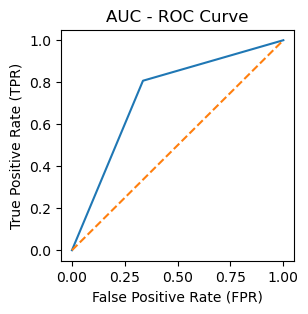

In [22]:
plt.figure(figsize=(3,3))
plt.title('AUC - ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')

fpr,tpr,thresh = roc_curve(y_test,yhat_test)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle='dashed')
plt.show()

In [23]:
yhat_test

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1], dtype=int64)

In [24]:
#clf.predict_proba(X_test)

In [25]:
#clf.predict_proba(X_test)[:,1]

In [26]:
from pickle import dump

In [27]:
dump(clf, open('clf.pkl', 'wb'))